<h2>Step 0: Imports</h2>

In [8]:
import pandas as pd
import numpy as np
import keras
from keras import layers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf
import phik
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

#from ctgan import CTGAN
#from sklearn.ensemble import IsolationForest
#from sklearn.preprocessing import KBinsDiscretizer
#from imblearn.under_sampling import RandomUnderSampler
#from sklearn.linear_model import RANSACRegressor
#from imblearn.over_sampling import SMOTE, ADASYN

pd.set_option('display.float_format', '{:.2f}'.format)

<h2>Step 1: Choose a Dataset</h2>
<p>While the almond Dataset worked really well, and everything went Smooth, i think maybe choosing the regression Dataset tat is full of Problems and challanges, might be better, there i changed, cut, removed, generated, so much things, that it is a "Ship of Theseus" So while it will Probably be bad, and most ofmy changes will probably have made the dataset useless and inaccurate and too farfrom the original, thats what i want to check right here </p>
<p>The Dataset, that i will be using is called "prepared_Zillow", this will be the clean_zillow  from excercie 1, with the collumns dropped from excercise 2, with no further work done, to ensure this you can look at preparation.ipynb</p>

<p><b>LEGACY:</b> I felt really good writing this text, now i have re-read the exercise Project, and it seems we have to do both datasets anyway, bruh</p>

<p><b>LEGACY 2:</b> I hav done all of step 1 In the Preparation.ipynb, i might rename it to step 1</p>

In [9]:
zf = pd.read_csv("Prepared_Zillow.csv")
af=pd.read_csv("Prepared_Almond.csv")

<h2>Step 2</h2>
<p>To Analyse the Data again, i will use my trusted Report file</p>

In [10]:
zf.head()

,longitude,countyFIPS,monthlyHoaFee,annualHomeownersInsurance,yearBuilt,latitude,rentZestimate,timeOnZillow,livingArea,zipcode,propertyTaxRate,bathrooms,bedrooms,price,homeType_CONDO,homeType_SINGLE_FAMILY,cluster,cluster_average_price
0,-149.91,2020.00,0.00,2840,1959.00,61.22,3142.00,3609.00,2668.00,99501,1.31,2.00,3.00,676100,0,1,0,624584.14
1,-149.91,2020.00,0.00,2934,1961.00,61.22,3113.00,4334.00,3179.00,99501,1.31,2.00,3.00,698600,0,1,0,624584.14
2,-149.91,2020.00,0.00,4187,1983.00,61.22,4282.00,3758.00,3059.00,99501,1.31,3.00,4.00,996800,0,1,0,624584.14
3,-149.91,2020.00,0.00,2920,1947.00,61.22,3458.00,3543.00,1642.00,99501,1.31,2.00,5.00,695300,0,1,0,624584.14
4,-149.91,2020.00,0.00,4100,2000.00,61.22,4161.00,3953.00,4483.00,99501,1.31,4.00,4.00,976100,1,0,0,624584.14


In [11]:
af.head()

,Length,Width,Area,Roundness,Solidity,Compactness,Aspect_Ratio,Eccentricity,Extent,Type,cluster,cluster_average_Type
0,272.55,227.94,22619.00,0.46,0.97,1.46,1.57,0.80,0.68,0,0,1.17
1,340.94,234.19,23038.00,0.45,0.96,1.60,1.55,0.76,0.66,0,1,0.88
2,344.60,229.42,22386.50,0.18,0.97,1.49,1.70,0.85,0.68,0,1,0.88
3,367.85,232.76,22578.50,0.55,0.97,1.54,1.94,0.81,0.69,0,2,0.69
4,276.14,230.15,19068.00,0.43,0.95,1.63,2.14,0.84,0.71,0,3,0.88


<h4>Associations</h4>

Zillow has a lot of rows that are still very useless.
Ydata says, FIPs LONGITUDE TAX RATE; TIME AND ZIPCODE ARE USELESS <br>
According to Sv there are some uses, but year build and time on zillow are bad <br>
The phiks matrix gives nothing a too bad score <br>
shap only gives home owner insurance a high score? <br>


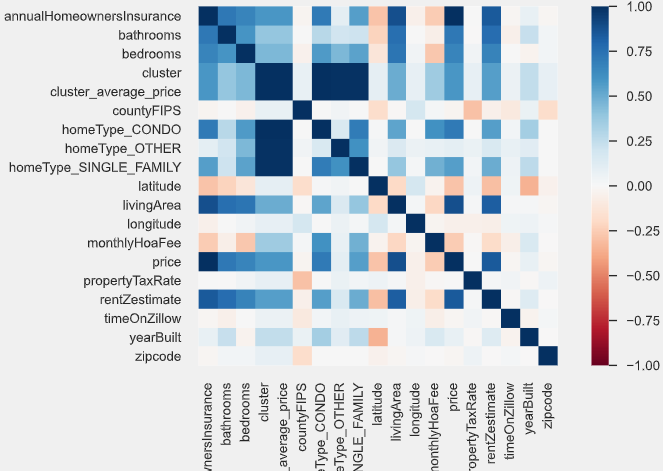
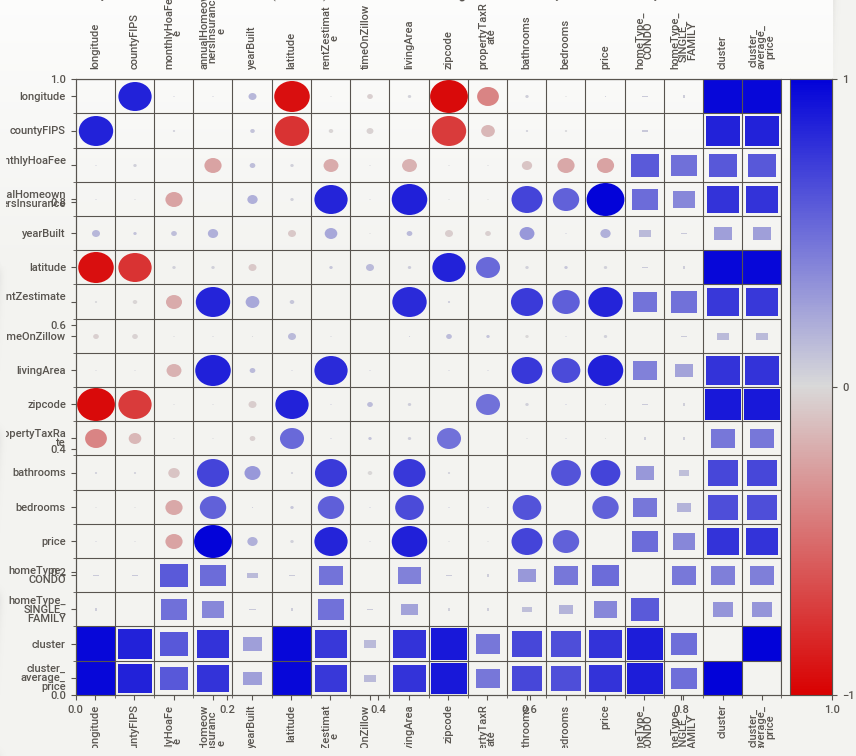

In [12]:
pf=pd.read_csv("phik_zillow.csv")
pf

,longitude,countyFIPS,monthlyHoaFee,annualHomeownersInsurance,yearBuilt,latitude,rentZestimate,timeOnZillow,livingArea,zipcode,propertyTaxRate,bathrooms,bedrooms,price,homeType_CONDO,homeType_SINGLE_FAMILY,cluster,cluster_average_price
0,1.00,0.77,0.01,0.17,0.46,0.79,0.17,0.10,0.00,0.93,0.83,0.00,0.03,0.17,0.00,0.03,0.74,0.74
1,0.77,1.00,0.00,0.19,0.66,0.82,0.19,0.08,0.00,0.87,0.92,0.00,0.00,0.19,0.00,0.00,0.73,0.73
2,0.01,0.00,1.00,0.47,0.28,0.03,0.39,0.04,0.36,0.04,0.04,0.17,0.31,0.47,0.77,0.62,0.54,0.54
3,0.17,0.19,0.47,1.00,0.38,0.12,0.87,0.00,0.87,0.16,0.22,0.57,0.52,1.00,0.87,0.70,0.80,0.80
4,0.46,0.66,0.28,0.38,1.00,0.48,0.35,0.06,0.36,0.59,0.66,0.29,0.28,0.38,0.45,0.34,0.57,0.57
5,0.79,0.82,0.03,0.12,0.48,1.00,0.15,0.15,0.00,0.89,0.82,0.00,0.00,0.12,0.01,0.00,0.71,0.71
6,0.17,0.19,0.39,0.87,0.35,0.15,1.00,0.00,0.91,0.18,0.22,0.67,0.64,0.87,0.71,0.64,0.72,0.72
7,0.10,0.08,0.04,0.00,0.06,0.15,0.00,1.00,0.04,0.10,0.10,0.00,0.00,0.00,0.03,0.05,0.12,0.12
8,0.00,0.00,0.36,0.87,0.36,0.00,0.91,0.04,1.00,0.00,0.00,0.62,0.58,0.87,0.68,0.50,0.73,0.73
9,0.93,0.87,0.04,0.16,0.59,0.89,0.18,0.10,0.00,1.00,0.84,0.00,0.00,0.16,0.00,0.00,0.72,0.72


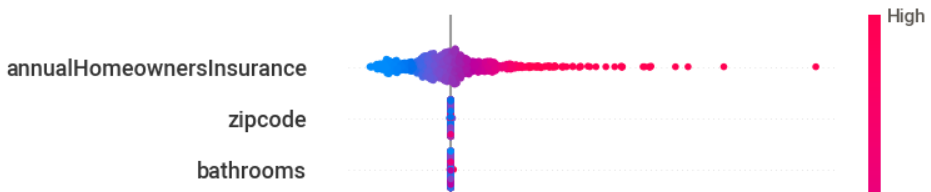

Almond has a lot of rows that are still very useless.
Ydata gives nothing too low of a relevance <br>
SV Roundness or eccentricy have few but still sustraincial corr <br>
The phiks matrix gives everything a good score <br>
Fisher said lengh is useless and roundness little<br>

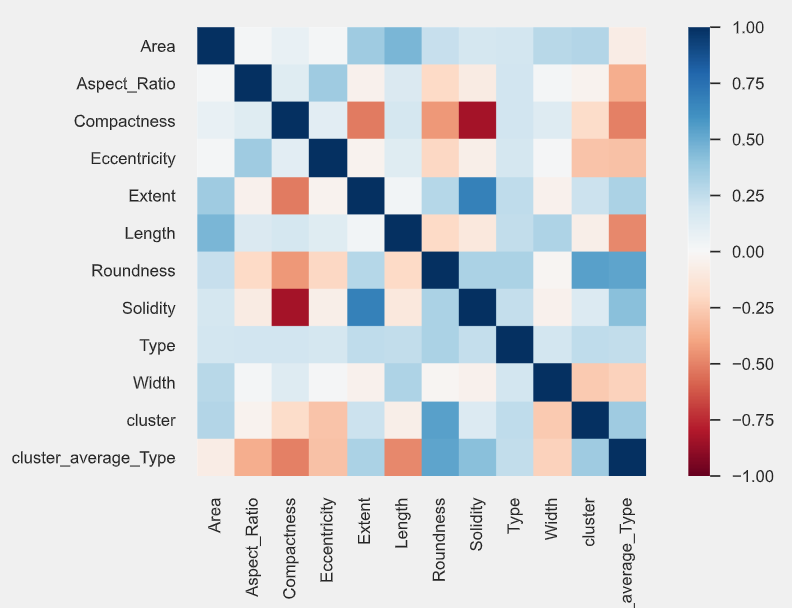
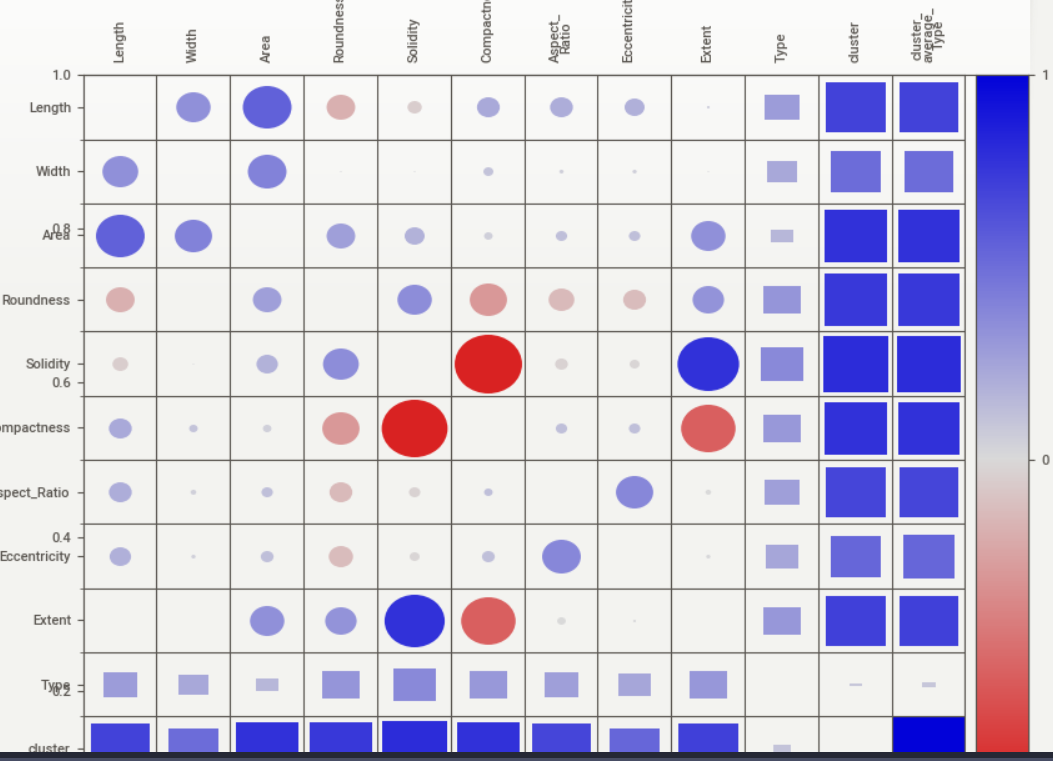

In [13]:
pf=pd.read_csv("phik_almond.csv")
pf

,Length,Width,Area,Roundness,Solidity,Compactness,Aspect_Ratio,Eccentricity,Extent,Type,cluster,cluster_average_Type
0,1.00,0.46,0.74,0.45,0.12,0.28,0.34,0.32,0.20,0.38,0.56,0.65
1,0.46,1.00,0.70,0.19,0.25,0.18,0.24,0.28,0.23,0.29,0.41,0.52
2,0.74,0.70,1.00,0.39,0.16,0.15,0.26,0.28,0.37,0.29,0.68,0.83
3,0.45,0.19,0.39,1.00,0.35,0.41,0.58,0.63,0.45,0.46,0.64,0.75
4,0.12,0.25,0.16,0.35,1.00,0.86,0.15,0.08,0.78,0.37,0.65,0.80
5,0.28,0.18,0.15,0.41,0.86,1.00,0.13,0.09,0.66,0.31,0.62,0.76
6,0.34,0.24,0.26,0.58,0.15,0.13,1.00,0.69,0.20,0.30,0.53,0.55
7,0.32,0.28,0.28,0.63,0.08,0.09,0.69,1.00,0.19,0.28,0.41,0.49
8,0.20,0.23,0.37,0.45,0.78,0.66,0.20,0.19,1.00,0.39,0.62,0.77
9,0.38,0.29,0.29,0.46,0.37,0.31,0.30,0.28,0.39,1.00,0.53,0.31


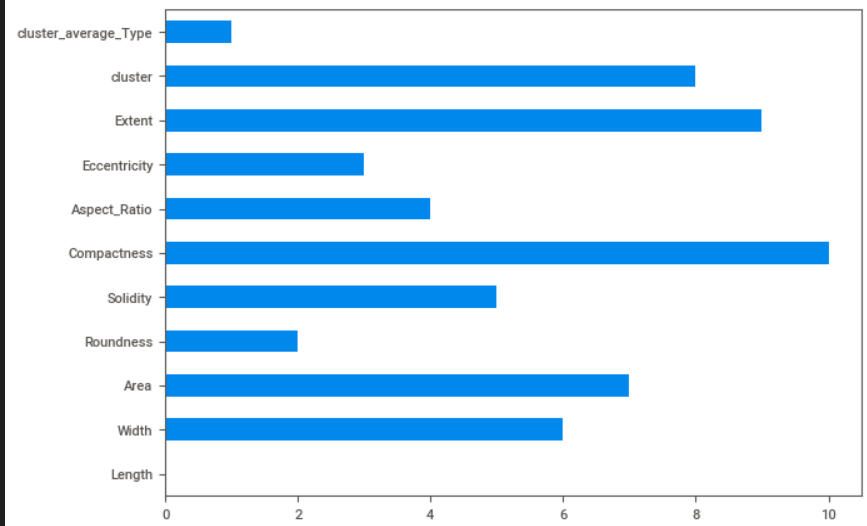

<h4>Distributions</h4>

<b>Zillow: </b> 6 Focused on Columns
<p>rentZestimate, livingArea, propertyTaxRate, bathrooms, bedrooms, price</p>

<p>The rent Zestimation Distribution is very good <br> Living Area Distribution is a bit skewed but overall very okay <br> The Property Tax rate is... fucked, honstly no idea how to fix it without tons of generated data or dropping <br> Bathroom Distribution Is very uneven here i think the generated Data does a way better job <br> Badrooms have the same problem as bathrooms but for the other side skewed <br>  Price distribution is skewed for the other side then living area distribution, ut other than that very well <br> The cluster have a very high ratio of one value</p>

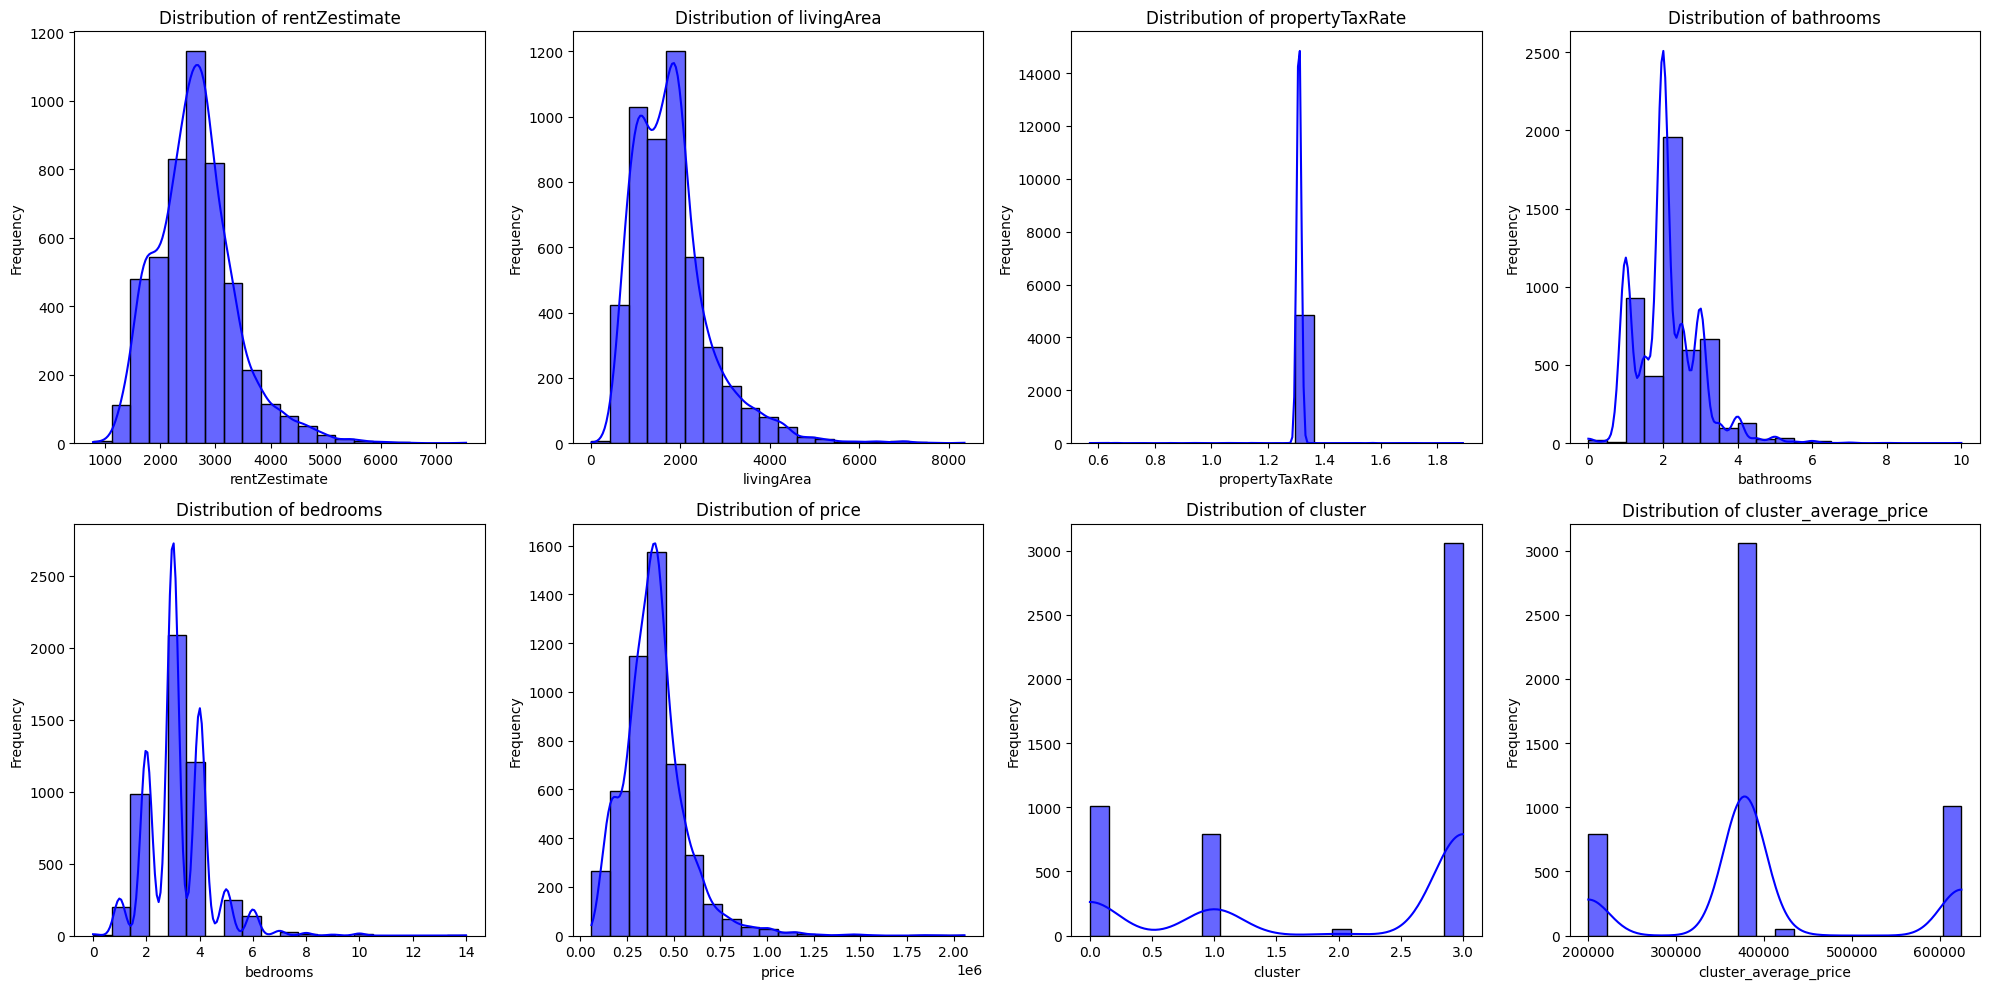

In [21]:
# Updated list of columns to analyze
columns = ['rentZestimate', 'livingArea', 'propertyTaxRate', 'bathrooms', 'bedrooms', 
           'price', 'cluster', 'cluster_average_price']

# Set up the plotting grid
plt.figure(figsize=(20, 10))  # Adjust figure size for more columns
for i, column in enumerate(columns, 1):
    plt.subplot(2, 4, i)  # Adjust to 2 rows, 4 columns
    sns.histplot(zf[column], kde=True, bins=20, color='blue', alpha=0.6)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


<b>Almond: </b>


<p>
Lengh: skewed to both sides? <br> 
Width: a bit far away from normal, but very good <br> 
Area: Skewed but balanced<br> 
Roundness as seen in excercise 2 has spikes per type, so this fits <br> 
Solidity Hard skewed <br>  
Compactness: opposite of solidity<br> 
Aspect Ratio: Sikes per type like  Roudness <br>
Eccentricity: Normal but not clean could use some cutting maybe <br>
Exten: Very weirdly skewed <br>
Type: Evenly Distributed <br>
Cluster: I think data generation could be a very very good thing to do here <br>
Cluster average type: skewed to the right but with a wide range what is this?

</p>

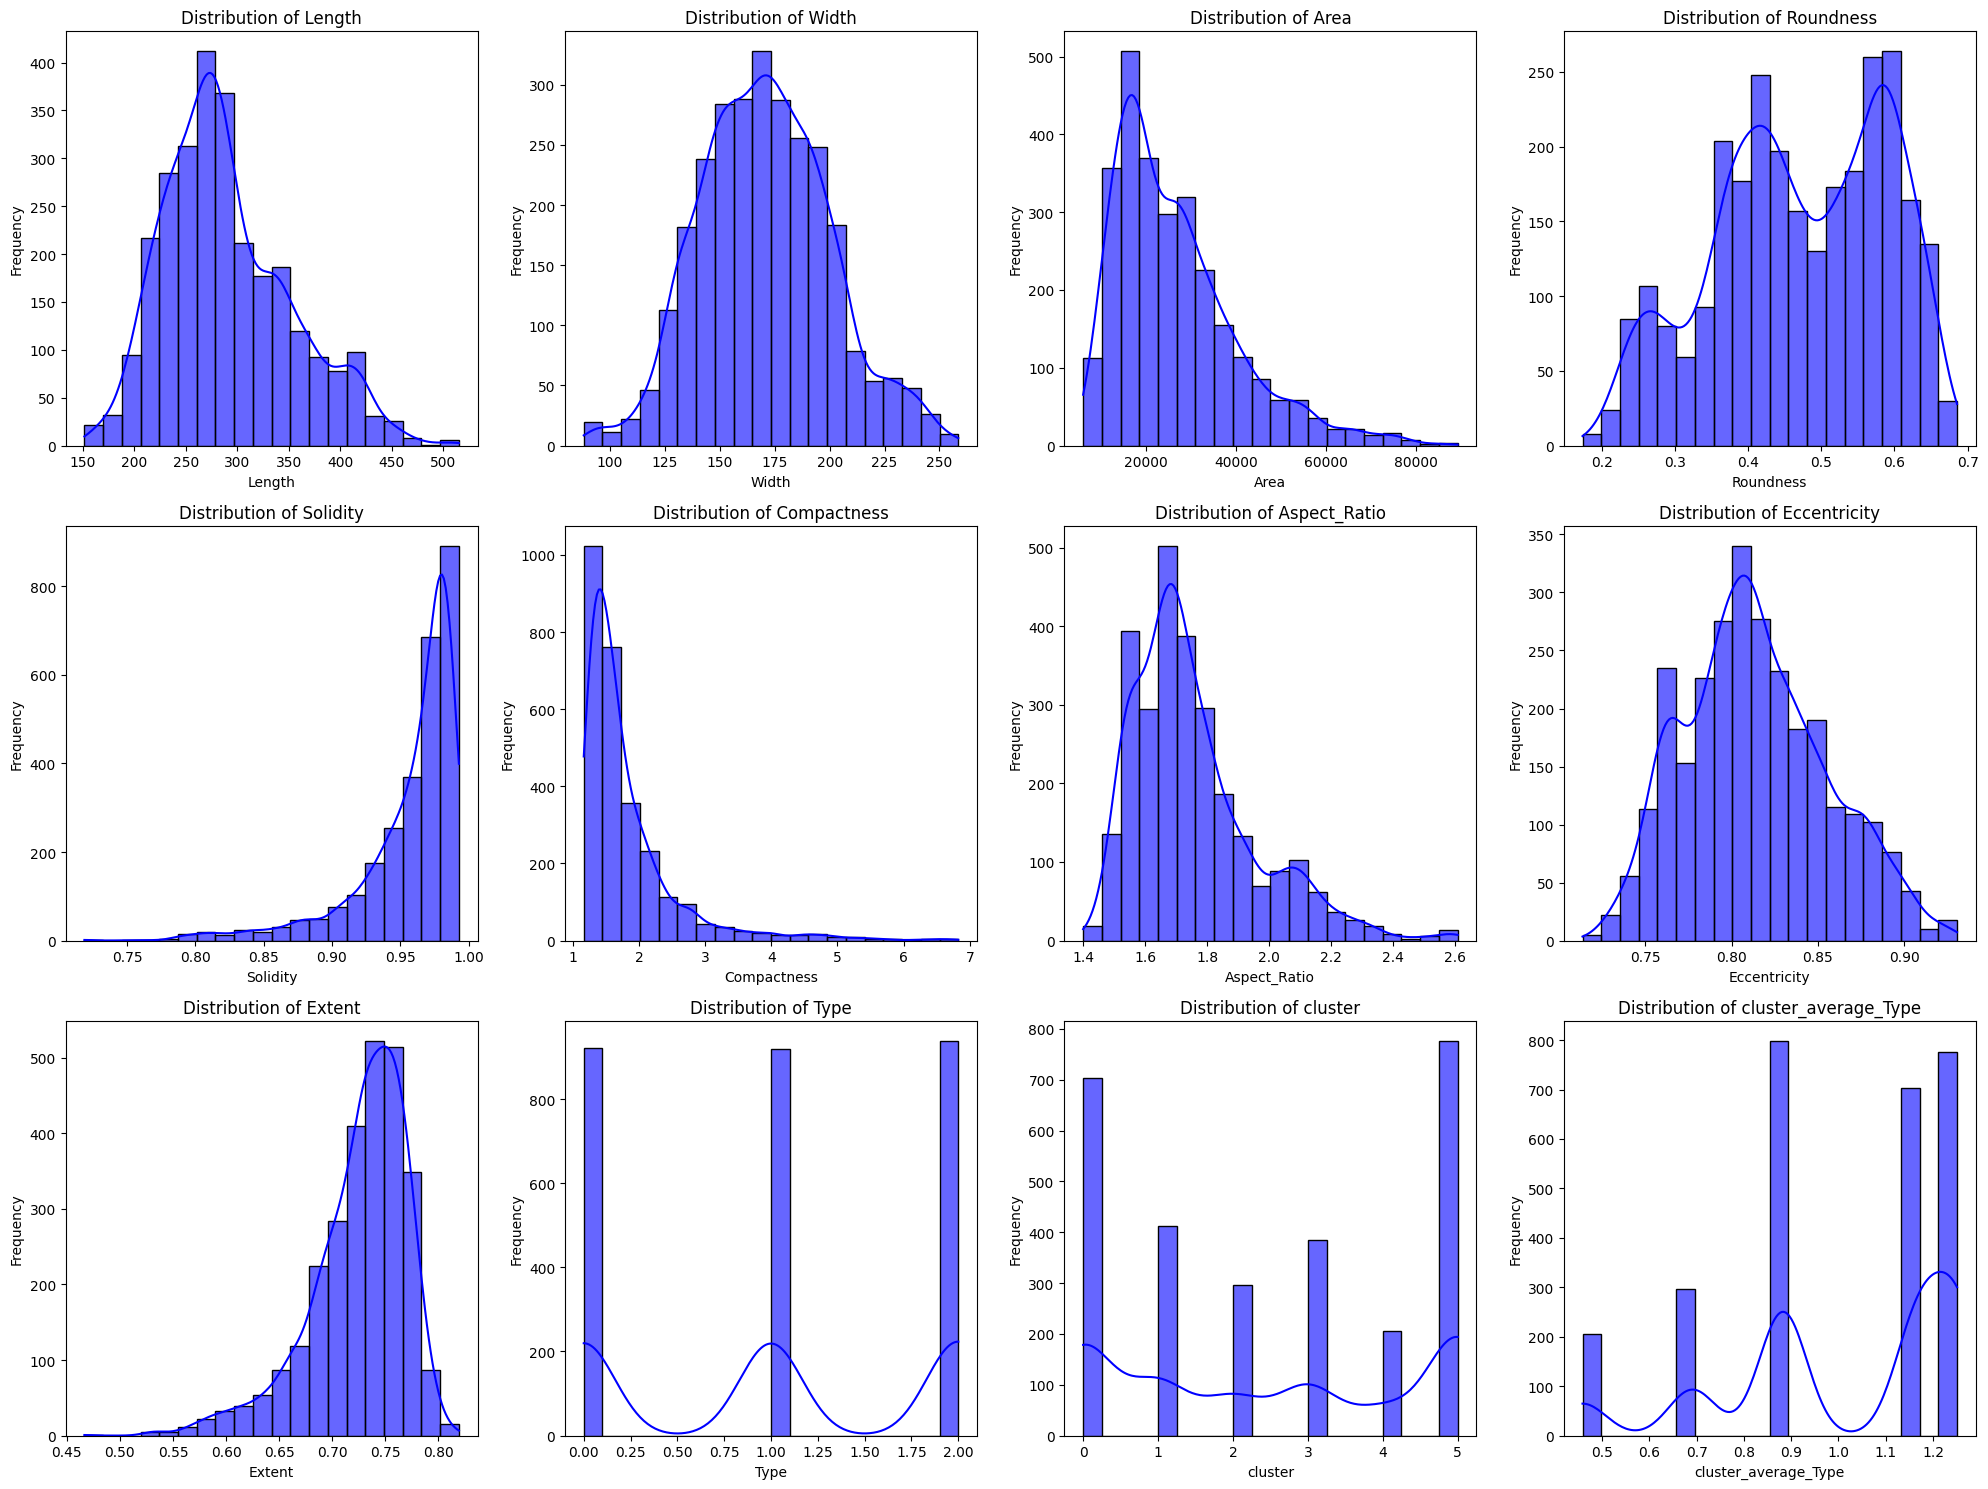

In [22]:
# Assuming 'af' is your DataFrame
plt.figure(figsize=(20, 15))  # Adjust figure size as needed

# Loop through all columns in the DataFrame
for i, column in enumerate(af.columns, 1):  # Start enumeration at 1 for subplot indexing
    plt.subplot((len(af.columns) + 3) // 4, 4, i)  # Auto-calculate grid size (rows = ceil(n_columns / 4))
    sns.histplot(af[column], kde=True, bins=20, color='blue', alpha=0.6)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout for clarity
plt.tight_layout()
plt.show()

<h2>Summary / Step 3</h2>
<ul>
<li>Zillow</li>
<p>The PCA and clustering does not solve a lot of the Steps that Data generation does, but the synthetic Data, destroys so much real data, that you can not know how accurate the result of the machne network is at the end, so i think this is better</p>

<li>Almond</li>
<p>The almond Dataset was clean at the beginning, this resulted for a very good dataset at the end, the pca helped, here i think that combining it with data generation would result in an optimal dataset to work on</p>

</ul>